In [ ]:
#import gensim
#import pandas as pd
#import keras
#import pickle
#import numpy as np

In [ ]:
#filename='preprocessed_data.pkl'

In [ ]:
#data=pickle.load(open(filename,'rb')) ###open preprocessed data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import textblob
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
import string
table = str.maketrans('', '', string.punctuation)
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()
from textblob import TextBlob

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def read_dataset():
    data = pd.read_csv(r"/content/drive/MyDrive/Data Set Suicidal/unprocessed.csv", sep = '\t', header = None)
    data.columns = ['sentence', 'labels']
    return data

In [ ]:
def sample_data(data, sample_value):
    data = data[:][:sample_value]
    return data

In [ ]:
print(read_dataset())

                                                 sentence  labels
0       I’m having anxiety right now and it’s not goin...       0
1       Its been a hard hard week for me, i decided to...       0
2       I was extremely suicidal 8 months ago. I reali...       1
3       After a long and terrible relationship and not...       0
4       Specifically against Yunkai and Astapor. Two c...       0
...                                                   ...     ...
207417  The love of my life is slowly drifting away fr...       1
207418  Because of all the shit that is happening in t...       1
207419  Kind of an oddball question, but for anybody w...       1
207420  The thought of taking exams is triggering suic...       1
207421  I havent been clinically/psychologically diagn...       0

[207422 rows x 2 columns]


In [ ]:
data = read_dataset()

In [ ]:
print(data)

                                                 sentence  labels
0       I’m having anxiety right now and it’s not goin...       0
1       Its been a hard hard week for me, i decided to...       0
2       I was extremely suicidal 8 months ago. I reali...       1
3       After a long and terrible relationship and not...       0
4       Specifically against Yunkai and Astapor. Two c...       0
...                                                   ...     ...
207417  The love of my life is slowly drifting away fr...       1
207418  Because of all the shit that is happening in t...       1
207419  Kind of an oddball question, but for anybody w...       1
207420  The thought of taking exams is triggering suic...       1
207421  I havent been clinically/psychologically diagn...       0

[207422 rows x 2 columns]


In [ ]:
def avg_word_len (sentence):
    words = sentence.split()
    avg_len = sum(len(word) for word in words)/len(words)
    return avg_len

def extract_ngrams(data, num):
    '''
    Function to generate n-grams from sentences
    '''
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [ ]:
print(data.shape)
data.head()

(207422, 2)


,sentence,labels
0,I’m having anxiety right now and it’s not goin...,0
1,"Its been a hard hard week for me, i decided to...",0
2,I was extremely suicidal 8 months ago. I reali...,1
3,After a long and terrible relationship and not...,0
4,Specifically against Yunkai and Astapor. Two c...,0


In [ ]:
data['char_count'] = data['sentence'].str.len()
df_train_sort_charcount = data.sort_values(by='char_count', ascending=False)
df_train_sort_charcount[['sentence', 'char_count']].head()

,sentence,char_count
95803,https://www.evernote.com/shard/s405/sh/cb9e84c...,39883
52839,Felicia: [Part 1](https://www.reddit.com/r/nos...,39366
117650,Some may remember me. I was asked what’s going...,37055
117543,"Microwave, Penicillin, chocolate chip cookies,...",36819
91805,\[Before I post this: this turned out way long...,36788


In [ ]:
data['word_count'] = data['sentence'].apply(lambda x: len(str(x).split(" ")))
df_train_sort_wordcount = data.sort_values(by='word_count', ascending=False)
df_train_sort_wordcount[['sentence','word_count']].head()

,sentence,word_count
95803,https://www.evernote.com/shard/s405/sh/cb9e84c...,7115
117650,Some may remember me. I was asked what’s going...,7027
91805,\[Before I post this: this turned out way long...,6707
186512,I’m an avid explorer. For as long as I can rem...,6518
117543,"Microwave, Penicillin, chocolate chip cookies,...",6512


In [ ]:
data = data['sentence'][0]
print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

1-gram:  ['I', '’', 'm', 'having', 'anxiety', 'right', 'now', 'and', 'it', '’', 's', 'not', 'going', 'away', 'it', 'didn', '’', 't', 'work', 'to', 'eat', 'I', '’', 'm', 'so', 'worried', 'about', 'getting', 'sick', 'What', 'can', 'I', 'do']
2-gram:  ['I ’', '’ m', 'm having', 'having anxiety', 'anxiety right', 'right now', 'now and', 'and it', 'it ’', '’ s', 's not', 'not going', 'going away', 'away it', 'it didn', 'didn ’', '’ t', 't work', 'work to', 'to eat', 'eat I', 'I ’', '’ m', 'm so', 'so worried', 'worried about', 'about getting', 'getting sick', 'sick What', 'What can', 'can I', 'I do']
3-gram:  ['I ’ m', '’ m having', 'm having anxiety', 'having anxiety right', 'anxiety right now', 'right now and', 'now and it', 'and it ’', 'it ’ s', '’ s not', 's not going', 'not going away', 'going away it', 'away it didn', 'it didn ’', 'didn ’ t', '’ t work', 't work to', 'work to eat', 'to eat I', 'eat I ’', 'I ’ m', '’ m so', 'm so worried', 'so worried about', 'worried about getting', '

In [ ]:
def convert_to_string (df_train):
    for i in range(len(df_train)):
        df_train['sentence'][i] = str(df_train['sentence'][i])
    return data

def data_processing(data):
    for i in range(len(data)):
        # Remove Excape Sequences
        sentence = remove_excape_sequesces(data['sentence'][i])
        # Remove Links
        sentence = remove_links(sentence)
        # Forming the final paragraphs
        senetnce = form_paragraph(sentence)
        # Perform further NLP processing
        sentence = apply_NLP(sentence)

        data['sentence'][i] = sentence
    return data

def apply_NLP (sentence):
    sentences = sentence.split(sep = '.')
    for i in range(len(sentences)):
        # Tokenize the words
        tokens = word_tokenize(sentences[i])
        tokens = [word.lower() for word in tokens]
        # Remove puntuations
        no_punctuations = [word.translate(table) for word in tokens]
        # Remove all non-alphabetic characters.
        words = [word for word in no_punctuations if word.isalpha()]
        # Remove Stop words and convert the sentence to its base form
        words = [word_lem.lemmatize(w) for w in words if not w in stop_words]
        sentences[i] = " ".join(words)
    sentence = " .".join(sentences)
    return sentence+"."

def remove_excape_sequesces (sentence):
    excape_sequences = ['\n', '\t', '\r', '\\', '\a', '\f', '\o', '\v', '\b', '\"', '\'', '\newline']
    temp = ""
    sentence = str(sentence)
    for i in sentence:
        if i in excape_sequences:
            continue
        temp += i
    return temp

def remove_links (sentence):
    comment = sentence.split(sep = " ")
    for word in comment:
        if ('http' in word) or ('www' in word) or ('https' in word) or (len(word) == 0):
            comment.remove(word)
    sentence = " ".join(comment)
    return sentence

def form_paragraph (sentence):
    temp = nltk.sent_tokenize(sentence)
    for index in range(len(temp)):
        temp[index] = temp[index].replace('.', ' ')
    for index in range(len(temp)):
        d = []
        k = temp[index].split(sep = ' ')
        for z in range(len(k)):
            if len(k[z]) > 0:
                d.append(k[z]) 
        s = ''
        for j in range(len(d)):
            s = s + ' ' + d[j].strip()
        temp[index] = s.strip()      
    sentence = '. '.join(temp).lower()
    return sentence

In [ ]:
data = read_dataset()
data = sample_data(data, 2000)
data = convert_to_string(data)
data = data_processing(data)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sentence,labels
0,anxiety right going away . . .work eat . . .wo...,0
1,hard hard week decided go get happy drink orde...,0
2,extremely suicidal month ago .realized ive rui...,1
3,long terrible relationship going school anxiet...,0
4,specifically yunkai astapor .two city full inn...,0
...,...,...
1995,cersei ring bell impressed made call instead b...,0
1996,apology edgy title promise im .reason im dead ...,1
1997,hi guy new server people problem looking frien...,0
1998,hello everyone hope well .child despite consta...,1


In [ ]:
X = data['sentence']

In [ ]:
Y = data['labels']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.5)

In [ ]:
!pip install ktrain

In [ ]:
len(data)

2000

In [ ]:
Y= data.iloc[:,1].values
Y

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0) ##split the data in training and testing

In [ ]:
print(len(X_train)) ###length of training, testing data
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

1600
400
1600
400


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
def create_tokens(lines):
    tokens = Tokenizer()        ###function to create tokens
    tokens.fit_on_texts(lines)
    return tokens

In [ ]:
train_tokenizer = create_tokens(X_train)

In [ ]:
def encode_sentences(tokens,length,lines):   ###function to pad the data to maximum phrase length
    X=tokens.texts_to_sequences(lines)
    X=pad_sequences(X,length,padding='post')
    return X

In [ ]:
X_train = encode_sentences(train_tokenizer,100, X_train)
X_test = encode_sentences(train_tokenizer,100, X_test)

In [ ]:
print(X_train.shape)   ###check for dimensions
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 100)
(400, 100)
(1600,)
(400,)


In [ ]:
vocab_len= len(train_tokenizer.word_index ) + 1 
vocab_len   ###vocab length

11404

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional, Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.layers import Layer
import keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional, Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
import keras
import keras.utils
from keras import utils as np_utils

from keras.layers import Dense 
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
seq_input = keras.Input(shape=(100,))
e = Embedding(vocab_len, 100, input_length= 100)(seq_input)
conv1 = Conv1D(filters=128,kernel_size=5,activation='relu',strides= 1, kernel_initializer='he_uniform')(e)
pool = MaxPooling1D(pool_size=2)(conv1)
dropout= Dropout(0.5)(pool)
lstm1 = Bidirectional(LSTM(10, return_sequences=True))(dropout)
att=attention()(lstm1)
dense1 = Dense(units = 20, activation='relu', kernel_initializer='he_uniform')(att)
output= Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform')(dense1)
model=keras.Model(seq_input,output)

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
attention_history=model.fit(X_train, Y_train, epochs = 25, batch_size = 64, verbose = 1, validation_split = 0.1)

Epoch 1/25
23/23 [==============================] - 9s 180ms/step - loss: 0.6932 - accuracy: 0.4916 - val_loss: 0.6831 - val_accuracy: 0.5938
Epoch 2/25
23/23 [==============================] - 3s 119ms/step - loss: 0.6555 - accuracy: 0.6697 - val_loss: 0.6103 - val_accuracy: 0.6562
Epoch 3/25
23/23 [==============================] - 3s 119ms/step - loss: 0.4080 - accuracy: 0.8837 - val_loss: 0.5576 - val_accuracy: 0.7000
Epoch 4/25
23/23 [==============================] - 3s 114ms/step - loss: 0.2136 - accuracy: 0.9312 - val_loss: 0.6361 - val_accuracy: 0.7500
Epoch 5/25
23/23 [==============================] - 3s 114ms/step - loss: 0.1177 - accuracy: 0.9659 - val_loss: 0.8564 - val_accuracy: 0.7375
Epoch 6/25
23/23 [==============================] - 3s 114ms/step - loss: 0.0854 - accuracy: 0.9778 - val_loss: 0.8661 - val_accuracy: 0.7312
Epoch 7/25
23/23 [==============================] - 3s 116ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 1.0000 - val_accuracy: 0.7063
Epoch 

In [ ]:
score = model.evaluate(X_test,Y_test,verbose = 1)
score[1]

13/13 [==============================] - 0s 17ms/step - loss: 1.5959 - accuracy: 0.7075


0.7074999809265137

In [ ]:
def model_attention_create(optimizer = 'Adam',
                 dropout_rate = 0.2, nb_filters = 256, kernel_size = 5,pool_size=2,units = 128,neurons = 20):
    
    seq_input = keras.Input(shape=(100,))
    e = Embedding(vocab_len, 100, input_length= 100)(seq_input)
    conv1 = Conv1D(nb_filters,kernel_size,activation='relu',strides= 1, kernel_initializer='he_uniform')(e)
    pool = MaxPooling1D(pool_size)(conv1)
    dropout= Dropout(0.5)(pool)
    lstm1 = Bidirectional(LSTM(10, return_sequences=True))(dropout)
    att=attention()(lstm1)
    dense1 = Dense(units = neurons, activation='relu', kernel_initializer='he_uniform')(att)
    output= Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform')(dense1)
    model=keras.Model(seq_input,output) 
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
param_grid = {
    'units': [10,20,64,128]

}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] units=10 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
40/40 - 8s - loss: 0.6935 - accuracy: 0.5367
Epoch 2/10
40/40 - 4s - loss: 0.5779 - accuracy: 0.7047
Epoch 3/10
40/40 - 4s - loss: 0.3008 - accuracy: 0.8828
Epoch 4/10
40/40 - 4s - loss: 0.1474 - accuracy: 0.9547
Epoch 5/10
40/40 - 4s - loss: 0.0922 - accuracy: 0.9672
Epoch 6/10
40/40 - 4s - loss: 0.0618 - accuracy: 0.9828
Epoch 7/10
40/40 - 4s - loss: 0.0268 - accuracy: 0.9953
Epoch 8/10
40/40 - 4s - loss: 0.0216 - accuracy: 0.9953
Epoch 9/10
40/40 - 4s - loss: 0.0114 - accuracy: 0.9977
Epoch 10/10
40/40 - 4s - loss: 0.0065 - accuracy: 0.9992
10/10 - 1s - loss: 1.1925 - accuracy: 0.7250
[CV] ......................................... units=10, total=  46.3s
[CV] units=10 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.3s remaining:    0.0s


Epoch 1/10
40/40 - 8s - loss: 0.6931 - accuracy: 0.5070
Epoch 2/10
40/40 - 4s - loss: 0.5979 - accuracy: 0.7172
Epoch 3/10
40/40 - 4s - loss: 0.3018 - accuracy: 0.8930
Epoch 4/10
40/40 - 4s - loss: 0.1538 - accuracy: 0.9570
Epoch 5/10
40/40 - 4s - loss: 0.0882 - accuracy: 0.9750
Epoch 6/10
40/40 - 4s - loss: 0.0682 - accuracy: 0.9797
Epoch 7/10
40/40 - 4s - loss: 0.0454 - accuracy: 0.9820
Epoch 8/10
40/40 - 4s - loss: 0.0306 - accuracy: 0.9945
Epoch 9/10
40/40 - 4s - loss: 0.0140 - accuracy: 0.9977
Epoch 10/10
40/40 - 4s - loss: 0.0120 - accuracy: 0.9969
10/10 - 1s - loss: 1.2416 - accuracy: 0.7125
[CV] ......................................... units=10, total=  47.7s
[CV] units=10 ........................................................
Epoch 1/10
40/40 - 7s - loss: 0.6929 - accuracy: 0.5203
Epoch 2/10
40/40 - 4s - loss: 0.5829 - accuracy: 0.7242
Epoch 3/10
40/40 - 4s - loss: 0.3018 - accuracy: 0.8836
Epoch 4/10
40/40 - 4s - loss: 0.1648 - accuracy: 0.9508
Epoch 5/10
40/40 - 4s - loss

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 15.4min finished


Epoch 1/10
50/50 - 8s - loss: 0.6848 - accuracy: 0.5537
Epoch 2/10
50/50 - 5s - loss: 0.4558 - accuracy: 0.8188
Epoch 3/10
50/50 - 5s - loss: 0.2454 - accuracy: 0.9112
Epoch 4/10
50/50 - 5s - loss: 0.1571 - accuracy: 0.9531
Epoch 5/10
50/50 - 5s - loss: 0.1002 - accuracy: 0.9719
Epoch 6/10
50/50 - 5s - loss: 0.0644 - accuracy: 0.9831
Epoch 7/10
50/50 - 5s - loss: 0.0587 - accuracy: 0.9831
Epoch 8/10
50/50 - 5s - loss: 0.0408 - accuracy: 0.9919
Epoch 9/10
50/50 - 5s - loss: 0.0489 - accuracy: 0.9894
Epoch 10/10
50/50 - 5s - loss: 0.0525 - accuracy: 0.9856
Best accuracy:  0.70625
Best parameters:  {'units': 10}


In [ ]:
param_grid = {
    'nb_filters': [128,256],
    'kernel_size':[3,5],
    'pool_size':[2,4]

}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 2)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/2
40/40 - 5s - loss: 0.6909 - accuracy: 0.5312
Epoch 2/2
40/40 - 2s - loss: 0.5739 - accuracy: 0.7789
10/10 - 1s - loss: 0.4731 - accuracy: 0.7906
[CV] ....... kernel_size=3, nb_filters=128, pool_size=2, total=   9.7s
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


Epoch 1/2
40/40 - 5s - loss: 0.6920 - accuracy: 0.5359
Epoch 2/2
40/40 - 2s - loss: 0.5716 - accuracy: 0.7836
10/10 - 1s - loss: 0.6061 - accuracy: 0.6938
[CV] ....... kernel_size=3, nb_filters=128, pool_size=2, total=   9.0s
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................
Epoch 1/2
40/40 - 5s - loss: 0.6918 - accuracy: 0.5195
Epoch 2/2
40/40 - 2s - loss: 0.6091 - accuracy: 0.7633
10/10 - 1s - loss: 0.5256 - accuracy: 0.7594
[CV] ....... kernel_size=3, nb_filters=128, pool_size=2, total=   9.1s
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................
Epoch 1/2
40/40 - 5s - loss: 0.6931 - accuracy: 0.4977
Epoch 2/2
40/40 - 2s - loss: 0.6227 - accuracy: 0.7203
10/10 - 2s - loss: 0.5331 - accuracy: 0.7719
[CV] ....... kernel_size=3, nb_filters=128, pool_size=2, total=   9.9s
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................
Epoch 1/2
40/40 - 5s - loss: 0.6909 - accuracy: 0.5289
Epoch 2/2
40/40 - 2s - loss: 0.5517 - accuracy: 0.7758

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.1min finished


Epoch 1/2
50/50 - 7s - loss: 0.6921 - accuracy: 0.5069
Epoch 2/2
50/50 - 3s - loss: 0.5769 - accuracy: 0.7819
Best accuracy:  0.7518749952316284
Best parameters:  {'kernel_size': 3, 'nb_filters': 128, 'pool_size': 2}


In [ ]:
param_grid = {
    'neurons':[10,20,64,128]
}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 2)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] neurons=10 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/2
40/40 - 7s - loss: 0.6940 - accuracy: 0.5016
Epoch 2/2
40/40 - 4s - loss: 0.6884 - accuracy: 0.6234
10/10 - 1s - loss: 0.6712 - accuracy: 0.6125
[CV] ....................................... neurons=10, total=  12.9s
[CV] neurons=10 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


Epoch 1/2
40/40 - 7s - loss: 0.6937 - accuracy: 0.4930
Epoch 2/2
40/40 - 4s - loss: 0.6337 - accuracy: 0.6930
10/10 - 1s - loss: 0.5834 - accuracy: 0.6938
[CV] ....................................... neurons=10, total=  12.8s
[CV] neurons=10 ......................................................
Epoch 1/2
40/40 - 8s - loss: 0.6908 - accuracy: 0.5625
Epoch 2/2
40/40 - 4s - loss: 0.5443 - accuracy: 0.7688
10/10 - 1s - loss: 0.5323 - accuracy: 0.7469
[CV] ....................................... neurons=10, total=  13.8s
[CV] neurons=10 ......................................................
Epoch 1/2
40/40 - 7s - loss: 0.6922 - accuracy: 0.5203
Epoch 2/2
40/40 - 4s - loss: 0.5709 - accuracy: 0.7633
10/10 - 1s - loss: 0.5924 - accuracy: 0.7125
[CV] ....................................... neurons=10, total=  13.0s
[CV] neurons=10 ......................................................
Epoch 1/2
40/40 - 7s - loss: 0.6914 - accuracy: 0.4945
Epoch 2/2
40/40 - 4s - loss: 0.5704 - accuracy: 0.6898

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.4min finished


Epoch 1/2
50/50 - 8s - loss: 0.6877 - accuracy: 0.5381
Epoch 2/2
50/50 - 5s - loss: 0.4656 - accuracy: 0.8050
Best accuracy:  0.7443749904632568
Best parameters:  {'neurons': 128}


In [ ]:
param_grid = {
    'dropout_rate':[0.1,0.2,0.3,0.4,0.5]
}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 2)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] dropout_rate=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/2
40/40 - 8s - loss: 0.6923 - accuracy: 0.5391
Epoch 2/2
40/40 - 4s - loss: 0.6075 - accuracy: 0.7078
10/10 - 1s - loss: 0.5621 - accuracy: 0.7312
[CV] ................................. dropout_rate=0.1, total=  13.9s
[CV] dropout_rate=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


Epoch 1/2
40/40 - 7s - loss: 0.6957 - accuracy: 0.5102
Epoch 2/2
40/40 - 4s - loss: 0.6143 - accuracy: 0.6984
10/10 - 1s - loss: 0.5673 - accuracy: 0.7125
[CV] ................................. dropout_rate=0.1, total=  13.1s
[CV] dropout_rate=0.1 ................................................
Epoch 1/2
40/40 - 7s - loss: 0.6929 - accuracy: 0.5148
Epoch 2/2
40/40 - 4s - loss: 0.6062 - accuracy: 0.7406
10/10 - 1s - loss: 0.5451 - accuracy: 0.7344
[CV] ................................. dropout_rate=0.1, total=  13.2s
[CV] dropout_rate=0.1 ................................................
Epoch 1/2
40/40 - 8s - loss: 0.6919 - accuracy: 0.5047
Epoch 2/2
40/40 - 4s - loss: 0.5547 - accuracy: 0.7680
10/10 - 1s - loss: 0.5431 - accuracy: 0.7656
[CV] ................................. dropout_rate=0.1, total=  13.9s
[CV] dropout_rate=0.1 ................................................
Epoch 1/2
40/40 - 7s - loss: 0.6918 - accuracy: 0.5227
Epoch 2/2
40/40 - 4s - loss: 0.5645 - accuracy: 0.7508

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  5.6min finished


Epoch 1/2
50/50 - 8s - loss: 0.6907 - accuracy: 0.5250
Epoch 2/2
50/50 - 5s - loss: 0.5087 - accuracy: 0.8087
Best accuracy:  0.7418749928474426
Best parameters:  {'dropout_rate': 0.5}


In [ ]:
param_grid = {
    'batch_size':[32,64,128,256]
}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2, cv=2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 2)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] batch_size=32 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/2
25/25 - 5s - loss: 0.6928 - accuracy: 0.5088
Epoch 2/2
25/25 - 3s - loss: 0.6681 - accuracy: 0.6425
25/25 - 1s - loss: 0.6489 - accuracy: 0.6525
[CV] .................................... batch_size=32, total=  10.2s
[CV] batch_size=32 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


Epoch 1/2
25/25 - 5s - loss: 0.6944 - accuracy: 0.4888
Epoch 2/2
25/25 - 3s - loss: 0.6789 - accuracy: 0.6125
25/25 - 2s - loss: 0.6691 - accuracy: 0.6162
[CV] .................................... batch_size=32, total=  10.9s
[CV] batch_size=64 ...................................................
Epoch 1/2
13/13 - 6s - loss: 0.6953 - accuracy: 0.4950
Epoch 2/2
13/13 - 2s - loss: 0.6754 - accuracy: 0.6100
13/13 - 1s - loss: 0.6776 - accuracy: 0.5150
[CV] .................................... batch_size=64, total=  10.6s
[CV] batch_size=64 ...................................................
Epoch 1/2
13/13 - 6s - loss: 0.6932 - accuracy: 0.5263
Epoch 2/2
13/13 - 2s - loss: 0.6827 - accuracy: 0.5713
13/13 - 1s - loss: 0.6827 - accuracy: 0.5537
[CV] .................................... batch_size=64, total=  10.1s
[CV] batch_size=128 ..................................................
Epoch 1/2
7/7 - 7s - loss: 0.6924 - accuracy: 0.5263
Epoch 2/2
7/7 - 2s - loss: 0.6852 - accuracy: 0.5550
7/7

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min finished


Epoch 1/2
50/50 - 8s - loss: 0.6903 - accuracy: 0.5156
Epoch 2/2
50/50 - 5s - loss: 0.5122 - accuracy: 0.7806
Best accuracy:  0.6343749761581421
Best parameters:  {'batch_size': 32}


In [ ]:
seq_input = keras.Input(shape=(100,))
e = Embedding(vocab_len, 100, input_length= 100)(seq_input)
conv1 = Conv1D(filters=256,kernel_size=3,activation='relu',strides= 1, kernel_initializer='he_uniform')(e)
pool = MaxPooling1D(pool_size=2)(conv1)
dropout= Dropout(0.3)(pool)
lstm1 = Bidirectional(LSTM(64, return_sequences=True))(dropout)
att=attention()(lstm1)
dense1 = Dense(units = 128, activation='relu', kernel_initializer='he_uniform')(att)
output= Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform')(dense1)
att_model=keras.Model(seq_input,output)

In [ ]:
att_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
attention_history=att_model.fit(X_train, Y_train, epochs = 50, batch_size = 64, verbose = 1, validation_split = 0.1)

Epoch 1/50
96/96 [==============================] - 13s 134ms/step - loss: 0.2528 - accuracy: 0.9283 - val_loss: 0.1672 - val_accuracy: 0.9393
Epoch 2/50
96/96 [==============================] - 12s 124ms/step - loss: 0.1120 - accuracy: 0.9622 - val_loss: 0.1211 - val_accuracy: 0.9615
Epoch 3/50
96/96 [==============================] - 12s 123ms/step - loss: 0.0568 - accuracy: 0.9785 - val_loss: 0.1328 - val_accuracy: 0.9601
Epoch 4/50
96/96 [==============================] - 12s 122ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.1944 - val_accuracy: 0.9571
Epoch 5/50
96/96 [==============================] - 12s 123ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.1673 - val_accuracy: 0.9601
Epoch 6/50
96/96 [==============================] - 12s 123ms/step - loss: 0.0128 - accuracy: 0.9952 - val_loss: 0.2241 - val_accuracy: 0.9467
Epoch 7/50
96/96 [==============================] - 12s 123ms/step - loss: 0.0131 - accuracy: 0.9952 - val_loss: 0.2370 - val_accuracy: 0.9556

In [ ]:
score = att_model.evaluate(X_test,Y_test,verbose = 1)
score[1]

53/53 [==============================] - 1s 24ms/step - loss: 0.3995 - accuracy: 0.9538


0.9538461565971375

In [ ]:
import matplotlib.pyplot as plt                             ###plot loss on train and val data
plt.plot(attention_history.history['loss'])
plt.plot(attention_history.history['val_loss'])
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'],loc = 'upper right')
plt.show()

<Figure size 640x480 with 1 Axes>

In [ ]:
att_model.save('attention_model.hdf5')

In [ ]:
att_model.load_weights('attention_model.hdf5')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
Y_pred = att_model.predict(X_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(Y_test,Y_pred)        ###Model evaluation
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
F1 = f1_score(Y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[1547   43]
 [  35   65]]
precision is 0.6018518518518519
recall is  0.65
F1 score 0.625
specificity is 0.9729559748427673


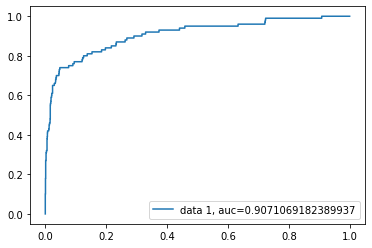

In [ ]:
Y_pred_proba = att_model.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
auc = roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
embeddings = dict()                                 ##read glove vector file
f = open('C:/Users/HP\Desktop/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:],dtype='float32')
    embeddings[word]=vectors
f.close()

In [ ]:
embedding_matrix = np.zeros((vocab_len, 100))      ###create a matrix consist of words and its vectors
for word, i in train_tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
seq_input = keras.Input(shape=(100,))
e = Embedding(vocab_len, 100, input_length= 100,weights = [embedding_matrix], trainable= False)(seq_input)
conv1 = Conv1D(filters=256,kernel_size=5,activation='relu',strides= 1, kernel_initializer='he_uniform')(e)
pool = MaxPooling1D(pool_size=4)(conv1)
dropout= Dropout(0.5)(pool)
lstm1 = Bidirectional(LSTM(64, return_sequences=True))(dropout)
att=attention()(lstm1)
dense1 = Dense(units = 128, activation='relu', kernel_initializer='he_uniform')(att)
output= Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform')(dense1)
att_model1=keras.Model(seq_input,output)

In [ ]:
att_model1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
attention_history=att_model1.fit(X_train, Y_train, epochs = 5, batch_size = 32, verbose = 1, validation_split = 0.1)

Epoch 1/50
191/191 [==============================] - 9s 49ms/step - loss: 0.1850 - accuracy: 0.9405 - val_loss: 0.1436 - val_accuracy: 0.9527
Epoch 2/50
191/191 [==============================] - 9s 46ms/step - loss: 0.1184 - accuracy: 0.9607 - val_loss: 0.1449 - val_accuracy: 0.9541
Epoch 3/50
191/191 [==============================] - 9s 46ms/step - loss: 0.0931 - accuracy: 0.9675 - val_loss: 0.1066 - val_accuracy: 0.9630
Epoch 4/50
191/191 [==============================] - 9s 46ms/step - loss: 0.0737 - accuracy: 0.9755 - val_loss: 0.1278 - val_accuracy: 0.9630
Epoch 5/50
191/191 [==============================] - 10s 55ms/step - loss: 0.0591 - accuracy: 0.9781 - val_loss: 0.1199 - val_accuracy: 0.9660
Epoch 6/50
191/191 [==============================] - 10s 54ms/step - loss: 0.0484 - accuracy: 0.9837 - val_loss: 0.1107 - val_accuracy: 0.9660
Epoch 7/50
191/191 [==============================] - 10s 52ms/step - loss: 0.0505 - accuracy: 0.9816 - val_loss: 0.1278 - val_accuracy: 0.9

In [ ]:
score = att_model1.evaluate(X_test,Y_test,verbose = 1)
score[1]

53/53 [==============================] - 1s 15ms/step - loss: 0.2060 - accuracy: 0.9657


0.9656804800033569

In [ ]:
def model_attention1_create(optimizer = 'Adam',
                 dropout_rate = 0.2, nb_filters = 256, kernel_size = 5,pool_size=2,units = 128,neurons = 20):
    
    seq_input = keras.Input(shape=(100,))
    e = Embedding(vocab_len, 100, input_length= 100,weights = [embedding_matrix], trainable= False)(seq_input)
    conv1 = Conv1D(nb_filters,kernel_size,activation='relu',strides= 1, kernel_initializer='he_uniform')(e)
    pool = MaxPooling1D(pool_size)(conv1)
    dropout= Dropout(0.5)(pool)
    lstm1 = Bidirectional(LSTM(10, return_sequences=True))(dropout)
    att=attention()(lstm1)
    dense1 = Dense(units = neurons, activation='relu', kernel_initializer='he_uniform')(att)
    output= Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform')(dense1)
    model=keras.Model(seq_input,output) 
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
param_grid = {
    'nb_filters': [128,256],
    'kernel_size':[3,5],
    'pool_size':[2,4]

}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention1_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................
Epoch 1/10
141/141 - 4s - loss: 0.2872 - accuracy: 0.9325
Epoch 2/10
141/141 - 4s - loss: 0.1792 - accuracy: 0.9374
Epoch 3/10
141/141 - 3s - loss: 0.1283 - accuracy: 0.9541
Epoch 4/10
141/141 - 3s - loss: 0.1202 - accuracy: 0.9596
Epoch 5/10
141/141 - 3s - loss: 0.1047 - accuracy: 0.9627
Epoch 6/10
141/141 - 3s - loss: 0.0945 - accuracy: 0.9665
Epoch 7/10
141/141 - 3s - loss: 0.0833 - accuracy: 0.9723
Epoch 8/10
141/141 - 4s - loss: 0.0741 - accuracy: 0.9749
Epoch 9/10
141/141 - 4s - loss: 0.0666 - accuracy: 0.9774
Epoch 10/10
141/141 - 4s - loss: 0.0599 - accuracy: 0.9805
71/71 - 0s - loss: 0.1230 - accuracy: 0.9614
[CV] ....... kernel_size=3, nb_filters=128, pool_size=2, total=  55.3s
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.2s remaining:    0.0s


Epoch 1/10
141/141 - 4s - loss: 0.2581 - accuracy: 0.9368
Epoch 2/10
141/141 - 5s - loss: 0.1757 - accuracy: 0.9381
Epoch 3/10
141/141 - 4s - loss: 0.1354 - accuracy: 0.9536
Epoch 4/10
141/141 - 4s - loss: 0.1134 - accuracy: 0.9585
Epoch 5/10
141/141 - 4s - loss: 0.1063 - accuracy: 0.9614
Epoch 6/10
141/141 - 4s - loss: 0.0916 - accuracy: 0.9665
Epoch 7/10
141/141 - 4s - loss: 0.0767 - accuracy: 0.9714
Epoch 8/10
141/141 - 4s - loss: 0.0700 - accuracy: 0.9727
Epoch 9/10
141/141 - 4s - loss: 0.0610 - accuracy: 0.9783
Epoch 10/10
141/141 - 4s - loss: 0.0562 - accuracy: 0.9798
71/71 - 1s - loss: 0.1066 - accuracy: 0.9658
[CV] ....... kernel_size=3, nb_filters=128, pool_size=2, total=  45.9s
[CV] kernel_size=3, nb_filters=128, pool_size=2 ......................
Epoch 1/10
141/141 - 4s - loss: 0.2586 - accuracy: 0.9361
Epoch 2/10
141/141 - 4s - loss: 0.1677 - accuracy: 0.9410
Epoch 3/10
141/141 - 4s - loss: 0.1321 - accuracy: 0.9552
Epoch 4/10
141/141 - 4s - loss: 0.1113 - accuracy: 0.9612


Epoch 10/10
141/141 - 6s - loss: 0.0540 - accuracy: 0.9829
71/71 - 2s - loss: 0.1023 - accuracy: 0.9676
[CV] ....... kernel_size=3, nb_filters=256, pool_size=4, total= 1.0min
[CV] kernel_size=5, nb_filters=128, pool_size=2 ......................
Epoch 1/10
141/141 - 5s - loss: 0.2732 - accuracy: 0.9365
Epoch 2/10
141/141 - 5s - loss: 0.1850 - accuracy: 0.9376
Epoch 3/10
141/141 - 5s - loss: 0.1359 - accuracy: 0.9525
Epoch 4/10
141/141 - 5s - loss: 0.1165 - accuracy: 0.9578
Epoch 5/10
141/141 - 5s - loss: 0.1096 - accuracy: 0.9607
Epoch 6/10
141/141 - 5s - loss: 0.0950 - accuracy: 0.9676
Epoch 7/10
141/141 - 5s - loss: 0.0871 - accuracy: 0.9727
Epoch 8/10
141/141 - 5s - loss: 0.0773 - accuracy: 0.9765
Epoch 9/10
141/141 - 5s - loss: 0.0749 - accuracy: 0.9751
Epoch 10/10
141/141 - 5s - loss: 0.0641 - accuracy: 0.9780
71/71 - 1s - loss: 0.1295 - accuracy: 0.9618
[CV] ....... kernel_size=5, nb_filters=128, pool_size=2, total=  54.6s
[CV] kernel_size=5, nb_filters=128, pool_size=2 .........

Epoch 6/10
141/141 - 6s - loss: 0.0832 - accuracy: 0.9727
Epoch 7/10
141/141 - 5s - loss: 0.0683 - accuracy: 0.9758
Epoch 8/10
141/141 - 6s - loss: 0.0582 - accuracy: 0.9803
Epoch 9/10
141/141 - 6s - loss: 0.0475 - accuracy: 0.9842
Epoch 10/10
141/141 - 5s - loss: 0.0439 - accuracy: 0.9849
71/71 - 1s - loss: 0.1135 - accuracy: 0.9636
[CV] ....... kernel_size=5, nb_filters=256, pool_size=4, total=  59.6s
[CV] kernel_size=5, nb_filters=256, pool_size=4 ......................
Epoch 1/10
141/141 - 6s - loss: 0.2344 - accuracy: 0.9330
Epoch 2/10
141/141 - 5s - loss: 0.1461 - accuracy: 0.9494
Epoch 3/10
141/141 - 5s - loss: 0.1099 - accuracy: 0.9612
Epoch 4/10
141/141 - 5s - loss: 0.0980 - accuracy: 0.9645
Epoch 5/10
141/141 - 5s - loss: 0.0872 - accuracy: 0.9698
Epoch 6/10
141/141 - 5s - loss: 0.0717 - accuracy: 0.9758
Epoch 7/10
141/141 - 5s - loss: 0.0602 - accuracy: 0.9803
Epoch 8/10
141/141 - 5s - loss: 0.0596 - accuracy: 0.9820
Epoch 9/10
141/141 - 5s - loss: 0.0497 - accuracy: 0.9822


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 22.3min finished


Epoch 1/10
212/212 - 4s - loss: 0.2506 - accuracy: 0.9318
Epoch 2/10
212/212 - 4s - loss: 0.1387 - accuracy: 0.9493
Epoch 3/10
212/212 - 4s - loss: 0.1168 - accuracy: 0.9609
Epoch 4/10
212/212 - 4s - loss: 0.1059 - accuracy: 0.9643
Epoch 5/10
212/212 - 4s - loss: 0.0899 - accuracy: 0.9694
Epoch 6/10
212/212 - 4s - loss: 0.0796 - accuracy: 0.9735
Epoch 7/10
212/212 - 4s - loss: 0.0692 - accuracy: 0.9780
Epoch 8/10
212/212 - 4s - loss: 0.0664 - accuracy: 0.9784
Epoch 9/10
212/212 - 4s - loss: 0.0558 - accuracy: 0.9828
Epoch 10/10
212/212 - 4s - loss: 0.0538 - accuracy: 0.9808
Best accuracy:  0.9676035692088703
Best parameters:  {'kernel_size': 3, 'nb_filters': 128, 'pool_size': 4}


In [ ]:
param_grid = {
    'neurons':[10,20,64,128]

}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention1_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] neurons=10 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
141/141 - 6s - loss: 0.2745 - accuracy: 0.9305
Epoch 2/10
141/141 - 7s - loss: 0.1665 - accuracy: 0.9436
Epoch 3/10
141/141 - 7s - loss: 0.1237 - accuracy: 0.9561
Epoch 4/10
141/141 - 7s - loss: 0.1002 - accuracy: 0.9672
Epoch 5/10
141/141 - 7s - loss: 0.0966 - accuracy: 0.9698
Epoch 6/10
141/141 - 6s - loss: 0.0821 - accuracy: 0.9747
Epoch 7/10
141/141 - 7s - loss: 0.0639 - accuracy: 0.9785
Epoch 8/10
141/141 - 7s - loss: 0.0568 - accuracy: 0.9816
Epoch 9/10
141/141 - 7s - loss: 0.0495 - accuracy: 0.9849
Epoch 10/10
141/141 - 7s - loss: 0.0435 - accuracy: 0.9867
71/71 - 1s - loss: 0.1494 - accuracy: 0.9636
[CV] ....................................... neurons=10, total= 1.2min
[CV] neurons=10 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


Epoch 1/10
141/141 - 8s - loss: 0.2703 - accuracy: 0.9272
Epoch 2/10
141/141 - 9s - loss: 0.1678 - accuracy: 0.9396
Epoch 3/10
141/141 - 8s - loss: 0.1523 - accuracy: 0.9436
Epoch 4/10
141/141 - 9s - loss: 0.1347 - accuracy: 0.9527
Epoch 5/10
141/141 - 9s - loss: 0.1196 - accuracy: 0.9570
Epoch 6/10
141/141 - 9s - loss: 0.1097 - accuracy: 0.9629
Epoch 7/10
141/141 - 9s - loss: 0.1046 - accuracy: 0.9623
Epoch 8/10
141/141 - 8s - loss: 0.0900 - accuracy: 0.9698
Epoch 9/10
141/141 - 8s - loss: 0.0790 - accuracy: 0.9738
Epoch 10/10
141/141 - 10s - loss: 0.0716 - accuracy: 0.9776
71/71 - 1s - loss: 0.1137 - accuracy: 0.9672
[CV] ....................................... neurons=10, total= 1.6min
[CV] neurons=10 ......................................................
Epoch 1/10
141/141 - 8s - loss: 0.2658 - accuracy: 0.9363
Epoch 2/10
141/141 - 9s - loss: 0.2032 - accuracy: 0.9363
Epoch 3/10
141/141 - 8s - loss: 0.1403 - accuracy: 0.9530
Epoch 4/10
141/141 - 8s - loss: 0.1131 - accuracy: 0.9618

Epoch 10/10
141/141 - 7s - loss: 0.0418 - accuracy: 0.9854
71/71 - 1s - loss: 0.1476 - accuracy: 0.9574
[CV] ...................................... neurons=128, total= 1.3min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 16.6min finished


Epoch 1/10
212/212 - 13s - loss: 0.2224 - accuracy: 0.9368
Epoch 2/10
212/212 - 13s - loss: 0.1345 - accuracy: 0.9488
Epoch 3/10
212/212 - 13s - loss: 0.1128 - accuracy: 0.9617
Epoch 4/10
212/212 - 13s - loss: 0.0994 - accuracy: 0.9664
Epoch 5/10
212/212 - 13s - loss: 0.0895 - accuracy: 0.9694
Epoch 6/10
212/212 - 13s - loss: 0.0758 - accuracy: 0.9753
Epoch 7/10
212/212 - 13s - loss: 0.0623 - accuracy: 0.9791
Epoch 8/10
212/212 - 13s - loss: 0.0529 - accuracy: 0.9803
Epoch 9/10
212/212 - 13s - loss: 0.0522 - accuracy: 0.9800
Epoch 10/10
212/212 - 13s - loss: 0.0446 - accuracy: 0.9848
Best accuracy:  0.9656804930793463
Best parameters:  {'neurons': 20}


In [ ]:
param_grid = {
    'dropout_rate':[0.1,0.2,0.3,0.4,0.5]

}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention1_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] dropout_rate=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
141/141 - 7s - loss: 0.2435 - accuracy: 0.9365
Epoch 2/10
141/141 - 8s - loss: 0.1554 - accuracy: 0.9427
Epoch 3/10
141/141 - 8s - loss: 0.1187 - accuracy: 0.9569
Epoch 4/10
141/141 - 8s - loss: 0.1001 - accuracy: 0.9669
Epoch 5/10
141/141 - 8s - loss: 0.0859 - accuracy: 0.9718
Epoch 6/10
141/141 - 8s - loss: 0.0841 - accuracy: 0.9729
Epoch 7/10
141/141 - 8s - loss: 0.0672 - accuracy: 0.9796
Epoch 8/10
141/141 - 8s - loss: 0.0632 - accuracy: 0.9800
Epoch 9/10
141/141 - 8s - loss: 0.0481 - accuracy: 0.9851
Epoch 10/10
141/141 - 8s - loss: 0.0480 - accuracy: 0.9871
71/71 - 1s - loss: 0.1228 - accuracy: 0.9596
[CV] ................................. dropout_rate=0.1, total= 1.5min
[CV] dropout_rate=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


Epoch 1/10
141/141 - 8s - loss: 0.2820 - accuracy: 0.9319
Epoch 2/10
141/141 - 8s - loss: 0.1892 - accuracy: 0.9399
Epoch 3/10
141/141 - 8s - loss: 0.1565 - accuracy: 0.9394
Epoch 4/10
141/141 - 8s - loss: 0.1374 - accuracy: 0.9481
Epoch 5/10
141/141 - 8s - loss: 0.1258 - accuracy: 0.9561
Epoch 6/10
141/141 - 8s - loss: 0.1180 - accuracy: 0.9581
Epoch 7/10
141/141 - 8s - loss: 0.1051 - accuracy: 0.9618
Epoch 8/10
141/141 - 8s - loss: 0.0899 - accuracy: 0.9714
Epoch 9/10
141/141 - 8s - loss: 0.0845 - accuracy: 0.9678
Epoch 10/10
141/141 - 8s - loss: 0.0749 - accuracy: 0.9751
71/71 - 1s - loss: 0.1146 - accuracy: 0.9667
[CV] ................................. dropout_rate=0.1, total= 1.4min
[CV] dropout_rate=0.1 ................................................
Epoch 1/10
141/141 - 7s - loss: 0.2459 - accuracy: 0.9350
Epoch 2/10
141/141 - 8s - loss: 0.1560 - accuracy: 0.9463
Epoch 3/10
141/141 - 8s - loss: 0.1277 - accuracy: 0.9594
Epoch 4/10
141/141 - 8s - loss: 0.1079 - accuracy: 0.9645


Epoch 10/10
141/141 - 7s - loss: 0.0500 - accuracy: 0.9831
71/71 - 1s - loss: 0.1412 - accuracy: 0.9680
[CV] ................................. dropout_rate=0.4, total= 1.2min
[CV] dropout_rate=0.5 ................................................
Epoch 1/10
141/141 - 8s - loss: 0.2388 - accuracy: 0.9374
Epoch 2/10
141/141 - 9s - loss: 0.1512 - accuracy: 0.9439
Epoch 3/10
141/141 - 9s - loss: 0.1172 - accuracy: 0.9596
Epoch 4/10
141/141 - 9s - loss: 0.1066 - accuracy: 0.9669
Epoch 5/10
141/141 - 9s - loss: 0.0905 - accuracy: 0.9711
Epoch 6/10
141/141 - 8s - loss: 0.0920 - accuracy: 0.9700
Epoch 7/10
141/141 - 9s - loss: 0.0726 - accuracy: 0.9785
Epoch 8/10
141/141 - 8s - loss: 0.0703 - accuracy: 0.9760
Epoch 9/10
141/141 - 9s - loss: 0.0565 - accuracy: 0.9836
Epoch 10/10
141/141 - 9s - loss: 0.0499 - accuracy: 0.9845
71/71 - 1s - loss: 0.1430 - accuracy: 0.9552
[CV] ................................. dropout_rate=0.5, total= 1.6min
[CV] dropout_rate=0.5 ...................................

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 21.4min finished


Epoch 1/10
212/212 - 12s - loss: 0.2364 - accuracy: 0.9337
Epoch 2/10
212/212 - 12s - loss: 0.1477 - accuracy: 0.9482
Epoch 3/10
212/212 - 12s - loss: 0.1212 - accuracy: 0.9611
Epoch 4/10
212/212 - 12s - loss: 0.1011 - accuracy: 0.9654
Epoch 5/10
212/212 - 12s - loss: 0.0937 - accuracy: 0.9688
Epoch 6/10
212/212 - 12s - loss: 0.0834 - accuracy: 0.9722
Epoch 7/10
212/212 - 12s - loss: 0.0726 - accuracy: 0.9749
Epoch 8/10
212/212 - 12s - loss: 0.0676 - accuracy: 0.9775
Epoch 9/10
212/212 - 12s - loss: 0.0598 - accuracy: 0.9809
Epoch 10/10
212/212 - 12s - loss: 0.0497 - accuracy: 0.9840
Best accuracy:  0.9646449758456304
Best parameters:  {'dropout_rate': 0.2}


In [ ]:
param_grid = {
    'units': [10,20,64,128]

}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_attention1_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(X_train, Y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] units=10 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
141/141 - 7s - loss: 0.2624 - accuracy: 0.9361
Epoch 2/10
141/141 - 7s - loss: 0.1641 - accuracy: 0.9434
Epoch 3/10
141/141 - 8s - loss: 0.1288 - accuracy: 0.9545
Epoch 4/10
141/141 - 7s - loss: 0.1111 - accuracy: 0.9618
Epoch 5/10
141/141 - 8s - loss: 0.1030 - accuracy: 0.9652
Epoch 6/10
141/141 - 7s - loss: 0.0988 - accuracy: 0.9678
Epoch 7/10
141/141 - 8s - loss: 0.0802 - accuracy: 0.9743
Epoch 8/10
141/141 - 7s - loss: 0.0758 - accuracy: 0.9740
Epoch 9/10
141/141 - 8s - loss: 0.0680 - accuracy: 0.9802
Epoch 10/10
141/141 - 8s - loss: 0.0581 - accuracy: 0.9838
71/71 - 1s - loss: 0.1243 - accuracy: 0.9623
[CV] ......................................... units=10, total= 1.3min
[CV] units=10 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


Epoch 1/10
141/141 - 7s - loss: 0.2478 - accuracy: 0.9377
Epoch 2/10
141/141 - 7s - loss: 0.1674 - accuracy: 0.9377
Epoch 3/10
141/141 - 7s - loss: 0.1385 - accuracy: 0.9485
Epoch 4/10
141/141 - 7s - loss: 0.1220 - accuracy: 0.9585
Epoch 5/10
141/141 - 7s - loss: 0.1006 - accuracy: 0.9665
Epoch 6/10
141/141 - 7s - loss: 0.0829 - accuracy: 0.9698
Epoch 7/10
141/141 - 7s - loss: 0.0748 - accuracy: 0.9729
Epoch 8/10
141/141 - 7s - loss: 0.0666 - accuracy: 0.9758
Epoch 9/10
141/141 - 7s - loss: 0.0602 - accuracy: 0.9774
Epoch 10/10
141/141 - 7s - loss: 0.0507 - accuracy: 0.9829
71/71 - 1s - loss: 0.1086 - accuracy: 0.9698
[CV] ......................................... units=10, total= 1.3min
[CV] units=10 ........................................................
Epoch 1/10
141/141 - 8s - loss: 0.2541 - accuracy: 0.9361
Epoch 2/10
141/141 - 8s - loss: 0.1663 - accuracy: 0.9405
Epoch 3/10
141/141 - 9s - loss: 0.1314 - accuracy: 0.9563
Epoch 4/10
141/141 - 8s - loss: 0.1088 - accuracy: 0.9665


Epoch 10/10
141/141 - 14s - loss: 0.0505 - accuracy: 0.9836
71/71 - 2s - loss: 0.1223 - accuracy: 0.9609
[CV] ........................................ units=128, total= 2.2min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 20.1min finished


Epoch 1/10
212/212 - 19s - loss: 0.2424 - accuracy: 0.9318
Epoch 2/10
212/212 - 19s - loss: 0.1431 - accuracy: 0.9488
Epoch 3/10
212/212 - 18s - loss: 0.1285 - accuracy: 0.9572
Epoch 4/10
212/212 - 19s - loss: 0.1227 - accuracy: 0.9586
Epoch 5/10
212/212 - 20s - loss: 0.1104 - accuracy: 0.9633
Epoch 6/10
212/212 - 20s - loss: 0.0984 - accuracy: 0.9678
Epoch 7/10
212/212 - 19s - loss: 0.0868 - accuracy: 0.9720
Epoch 8/10
212/212 - 19s - loss: 0.0826 - accuracy: 0.9725
Epoch 9/10
212/212 - 19s - loss: 0.0717 - accuracy: 0.9780
Epoch 10/10
212/212 - 19s - loss: 0.0658 - accuracy: 0.9791
Best accuracy:  0.9661242815781628
Best parameters:  {'units': 64}


In [ ]:
seq_input = keras.Input(shape=(100,))
e = Embedding(vocab_len, 100, input_length= 100,weights = [embedding_matrix], trainable= False)(seq_input)
conv1 = Conv1D(filters=128,kernel_size=3,activation='relu',strides= 1, kernel_initializer='he_uniform')(e)
pool = MaxPooling1D(pool_size=4)(conv1)
dropout= Dropout(0.2)(pool)
lstm1 = Bidirectional(LSTM(64, return_sequences=True))(dropout)
att=attention()(lstm1)
dense1 = Dense(units = 20, activation='relu', kernel_initializer='he_uniform')(att)
output= Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform')(dense1)
att_model2=keras.Model(seq_input,output)

In [ ]:
att_model2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
attention_history=att_model2.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 1, validation_split = 0.1)

Epoch 1/50
191/191 [==============================] - 12s 62ms/step - loss: 0.1860 - accuracy: 0.9453 - val_loss: 0.1187 - val_accuracy: 0.9586
Epoch 2/50
191/191 [==============================] - 9s 49ms/step - loss: 0.1119 - accuracy: 0.9638 - val_loss: 0.1147 - val_accuracy: 0.9615
Epoch 3/50
191/191 [==============================] - 10s 54ms/step - loss: 0.0855 - accuracy: 0.9719 - val_loss: 0.1024 - val_accuracy: 0.9645
Epoch 4/50
191/191 [==============================] - 10s 52ms/step - loss: 0.0681 - accuracy: 0.9775 - val_loss: 0.0918 - val_accuracy: 0.9645
Epoch 5/50
191/191 [==============================] - 10s 52ms/step - loss: 0.0524 - accuracy: 0.9831 - val_loss: 0.0889 - val_accuracy: 0.9719
Epoch 6/50
191/191 [==============================] - 11s 59ms/step - loss: 0.0480 - accuracy: 0.9842 - val_loss: 0.1232 - val_accuracy: 0.9704
Epoch 7/50
191/191 [==============================] - 10s 51ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.1104 - val_accuracy: 

In [ ]:
score = att_model2.evaluate(X_test,Y_test,verbose = 1)
score[1]

53/53 [==============================] - 1s 22ms/step - loss: 0.2692 - accuracy: 0.9675


0.9674556255340576

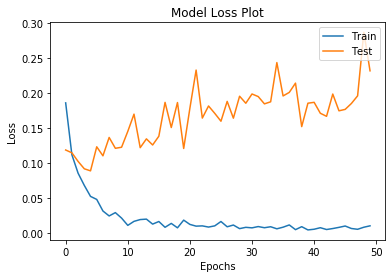

In [ ]:
import matplotlib.pyplot as plt                             ###plot loss on train and val data
plt.plot(attention_history.history['loss'])
plt.plot(attention_history.history['val_loss'])
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'],loc = 'upper right')
plt.show()

In [ ]:
att_model2.save('attention_pretrained.hdf5')

In [ ]:
att_model2.load_weights('attention_pretrained.hdf5')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
Y_pred = att_model2.predict(X_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(Y_test,Y_pred)        ###Model evaluation
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
F1 = f1_score(Y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[1585    5]
 [  50   50]]
precision is 0.9090909090909091
recall is  0.5
F1 score 0.6451612903225806
specificity is 0.9968553459119497


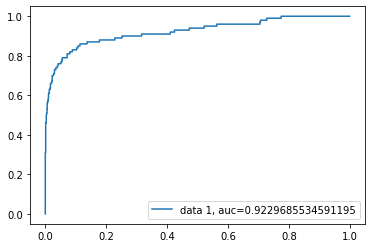

In [ ]:
Y_pred_proba = att_model2.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
auc = roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()